In [1]:
%cd ../..
from inference_diffusion_test import StyleTTS2

import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import torch.cuda

device = 'cuda' if torch.cuda.is_available() else 'cpu'
#device = 'cpu'

c:\code\StyleTTS2-lite\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


c:\code\StyleTTS2-lite


c:\code\StyleTTS2-lite\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\catto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
print(device)

cuda


In [3]:
def plot(wav, sr=24000):
    duration = len(wav) / sr
    # Create a figure with two subplots
    fig, ax = plt.subplots(2, 1, figsize=(10, 6))

    librosa.display.waveshow(wav, sr=sr, ax=ax[0])
    ax[0].set_title("Waveform")
    ax[0].set_xlim([0, duration]) 

    mel_spectrogram = librosa.feature.melspectrogram(y=wav, sr=sr)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, cmap='viridis', ax=ax[1])
    ax[1].set_title("Mel Spectrogram")
    ax[1].set_xlim([0, duration]) 

    # Show the plots
    plt.tight_layout()
    plt.show()

### Load G2P

If you did not use eSpeak for your language, please add your own G2P.

In [4]:
import sys
import phonemizer
if sys.platform.startswith("win"):
    try:
        from phonemizer.backend.espeak.wrapper import EspeakWrapper
        import espeakng_loader
        EspeakWrapper.set_library(espeakng_loader.get_library_path())
    except Exception as e:
        print(e)

def get_phoneme(text, lang):
    try:
        my_phonemizer = phonemizer.backend.EspeakBackend(language=lang, preserve_punctuation=True,  with_stress=True, language_switch='remove-flags')
        return my_phonemizer.phonemize([text])[0]
    except Exception as e:
        print(e)

In [5]:
from phonemizer.backend.espeak.wrapper import EspeakWrapper
import espeakng_loader
EspeakWrapper.set_library(espeakng_loader.get_library_path())

### Load models

In [6]:
config_path = "Configs/config.yaml"
models_path = "Models/Finetune/test_weight.pth"

### Synthesize speech

Little Note: Reference audio has a huge impact on the result. It is best to select audio around 10s long and consistent in both tone and speed.

In [7]:
speaker = {
    "path": "./Demo/Audio/1_heart.wav",  #Ref audio path
    "speed": 1.2,                        #Speaking speed
}

max_samples = 24000*20 #max 20 seconds ref audio
print(speaker['path'])
wave, sr = librosa.load(speaker['path'], sr=24000)
audio, index = librosa.effects.trim(wave, top_db=30)
if sr != 24000:              audio = librosa.resample(audio, sr, 24000)
if len(audio) > max_samples: audio = audio[:max_samples]
display(ipd.Audio(audio, rate=24000, normalize=True))

./Demo/Audio/1_heart.wav


In [12]:
text = '''
Tổng Bí thư Tô Lâm nhấn mạnh, cơ chế, chính sách quản lý thị trường vàng những năm qua đã điều chỉnh, hoàn thiện tích cực nhưng vẫn còn chậm đổi mới, chưa theo kịp sự phát triển của thị trường và thực tiễn. Do đó, ông cho rằng cần sớm đổi mới, hoàn thiện các cơ chế, chính sách này.

Về giải pháp, Tổng Bí thư nêu rõ cần hoàn thiện pháp lý, sớm điều chỉnh Nghị định 24/2012 theo hướng thị trường hóa có kiểm soát và lộ trình, nhằm tạo kết nối hiệu quả giữa thị trường trong nước và quốc tế.

Tổng Bí thư nhắc tới yêu cầu xóa bỏ thế độc quyền Nhà nước trong sản xuất vàng miếng. Việc này trên nguyên tắc Nhà nước vẫn quản lý nhưng cho phép nhiều doanh nghiệp đủ điều kiện tham gia, nhằm tạo môi trường cạnh tranh bình đẳng, đa dạng nguồn cung và ổn định giá.
'''

| Parameter      | Type   | Description                                                                 | Performance Impact                                |
|----------------|--------|-----------------------------------------------------------------------------|----------------------------------------------------|
| `avg_style`     | BOOL   | Split the reference audio and calculate the average speaking style.        | Higher computation during style extraction         |
| `denoise`       | FLOAT  | Adjusts denoiser strength; range [0, 1].                                   | Additional computation for style processing        |
| `stabilize`     | BOOL   | Stabilizes speaking speed for long-form synthesis.                         | Slight additional computation                      |
| `n_merge`       | INT    | Avoids short sentences by merging if words < `n_merge`.                   | Higher VRAM usage as value increases               |


In [9]:
model = StyleTTS2(config_path, models_path).eval().to(device)


Found: 189 symbols


c:\code\StyleTTS2-lite\.venv\lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
c:\code\StyleTTS2-lite\.venv\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


decoder : 54289492
predictor : 16194612
text_encoder : 5612032
style_encoder : 13845440
diffusion : 10110656

Total : 100052232


Computing the style for: ./Demo/Audio/1_heart.wav
Generating Audio...
Pre-merge chunk 6
After-merge chunk 5
t̪ˈo4ŋ bˈiɜ tˈy t̪ˈo lˈəm ɲˈəɜn mˈe-6ɲ, kˈəː tʃˈeɜ, tʃˈiɜɲ sˈe-ɜc kwˈaː4n lˈiɜ tˈi6 tʃˈyə2ŋ vˈaː2ŋ ɲˌy5ŋ nˈam kwˈaː ɗˌaː5 ɗˈiɛ2w tʃˈi4ɲ, hwˈaː2n tˈiɛ6n t̪ˈiɜc kˈy6c ɲˌyŋ vˌə5n kˌɔ2n tʃˈə6m ɗˈo4j mˈəːɜj, tʃˌyə tˈɛw kˈi6p sˈy6 fˈaːɜt̪ tʃˈiɛ4n kˌuə4 tˈi6 tʃˈyə2ŋ vˌaː2 tˈy6c t̪ˈiɛ5n
zˈɔ ɗˈɔɜ, ˈoŋ tʃˌɔ zˈa2ŋ kˈə2n sˈəːɜm ɗˈo4j mˈəːɜj, hwˈaː2n tˈiɛ6n kˌaːɜc kˈəː tʃˈeɜ, tʃˈiɜɲ sˈe-ɜc nˈa2j
vˈe2 zˈaː4j fˈaːɜp, t̪ˈo4ŋ bˈiɜ tˈy nˈe1w zˈɔ5 kˈə2n hwˈaː2n tˈiɛ6n fˈaːɜp lˈiɜ, sˈəːɜm ɗˈiɛ2w tʃˈi4ɲ ŋˈi6 ɗˈi6ɲ hˈaːɪ mˈyə7jbˈoɜn hˈaːɪ ŋˈaː2n xˌo1ŋtʃˈam mˈyə2jhˈaːɪ tˈɛw hˈyəɜŋ tˈi6 tʃˈyə2ŋ hwˈaːɜ kˈɔɜ kˈiɛ4m swˈaːɜt̪ vˌaː2 lˈo6 tʃˈi2ɲ, ɲˈa2m t̪ˈaː6w kˈeɜt̪ nˈoɜj hˈiɛ6w kwˈaː4 zˈyə5 tˈi6 tʃˈyə2ŋ tʃˈɔŋ nˈyəɜc vˌaː2 kˈuəɜc t̪ˈeɜ
t̪ˈo4ŋ bˈiɜ tˈy ɲˈaɜc t̪ˌəːɜj ˈiɛw kˈə2w swˈaːɜ bˈɔ4 tˈeɜ ɗˈo6k kwˈiɛ2n ɲˈaː2 nˈyəɜc tʃˈɔŋ sˈaː4n swˈəɜt̪ vˈaː2ŋ mˈiɛɜŋ
vˈiɛ6c nˈa2j tʃˈen ŋwˈiɛn t̪ˈaɜc ɲˈaː2 nˈyəɜc vˌə5n kwˈ

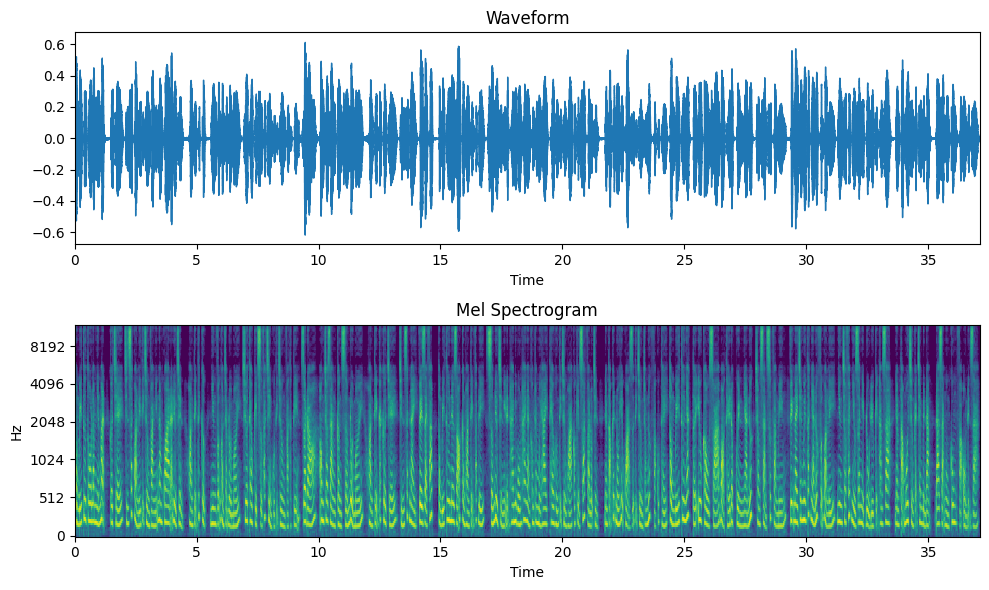

In [13]:
avg_style         = False
denoise           = 0.3
n_merge           = 6

steps             = None
embedding_scale   = None

with torch.no_grad():
    phonemes = get_phoneme(text=text, lang="vi")
    styles  = model.get_styles(speaker, denoise, avg_style)
    list_wav       = model.generate(phonemes, styles, steps, embedding_scale, n_merge, use_diffusion=False)
    wav = np.concatenate(list_wav)
# for chunk in list_wav:
#     display(ipd.Audio(chunk, rate=24000, normalize=True))
print('Synthesized:')
display(ipd.Audio(wav, rate=24000, normalize=True)) 


plot(wav)

Computing the style for: ./Demo/Audio/1_heart.wav
Generating Audio...
Pre-merge chunk 6
After-merge chunk 5
t̪ˈo4ŋ bˈiɜ tˈy t̪ˈo lˈəm ɲˈəɜn mˈe-6ɲ, kˈəː tʃˈeɜ, tʃˈiɜɲ sˈe-ɜc kwˈaː4n lˈiɜ tˈi6 tʃˈyə2ŋ vˈaː2ŋ ɲˌy5ŋ nˈam kwˈaː ɗˌaː5 ɗˈiɛ2w tʃˈi4ɲ, hwˈaː2n tˈiɛ6n t̪ˈiɜc kˈy6c ɲˌyŋ vˌə5n kˌɔ2n tʃˈə6m ɗˈo4j mˈəːɜj, tʃˌyə tˈɛw kˈi6p sˈy6 fˈaːɜt̪ tʃˈiɛ4n kˌuə4 tˈi6 tʃˈyə2ŋ vˌaː2 tˈy6c t̪ˈiɛ5n
zˈɔ ɗˈɔɜ, ˈoŋ tʃˌɔ zˈa2ŋ kˈə2n sˈəːɜm ɗˈo4j mˈəːɜj, hwˈaː2n tˈiɛ6n kˌaːɜc kˈəː tʃˈeɜ, tʃˈiɜɲ sˈe-ɜc nˈa2j
vˈe2 zˈaː4j fˈaːɜp, t̪ˈo4ŋ bˈiɜ tˈy nˈe1w zˈɔ5 kˈə2n hwˈaː2n tˈiɛ6n fˈaːɜp lˈiɜ, sˈəːɜm ɗˈiɛ2w tʃˈi4ɲ ŋˈi6 ɗˈi6ɲ hˈaːɪ mˈyə7jbˈoɜn hˈaːɪ ŋˈaː2n xˌo1ŋtʃˈam mˈyə2jhˈaːɪ tˈɛw hˈyəɜŋ tˈi6 tʃˈyə2ŋ hwˈaːɜ kˈɔɜ kˈiɛ4m swˈaːɜt̪ vˌaː2 lˈo6 tʃˈi2ɲ, ɲˈa2m t̪ˈaː6w kˈeɜt̪ nˈoɜj hˈiɛ6w kwˈaː4 zˈyə5 tˈi6 tʃˈyə2ŋ tʃˈɔŋ nˈyəɜc vˌaː2 kˈuəɜc t̪ˈeɜ
t̪ˈo4ŋ bˈiɜ tˈy ɲˈaɜc t̪ˌəːɜj ˈiɛw kˈə2w swˈaːɜ bˈɔ4 tˈeɜ ɗˈo6k kwˈiɛ2n ɲˈaː2 nˈyəɜc tʃˈɔŋ sˈaː4n swˈəɜt̪ vˈaː2ŋ mˈiɛɜŋ
vˈiɛ6c nˈa2j tʃˈen ŋwˈiɛn t̪ˈaɜc ɲˈaː2 nˈyəɜc vˌə5n kwˈ

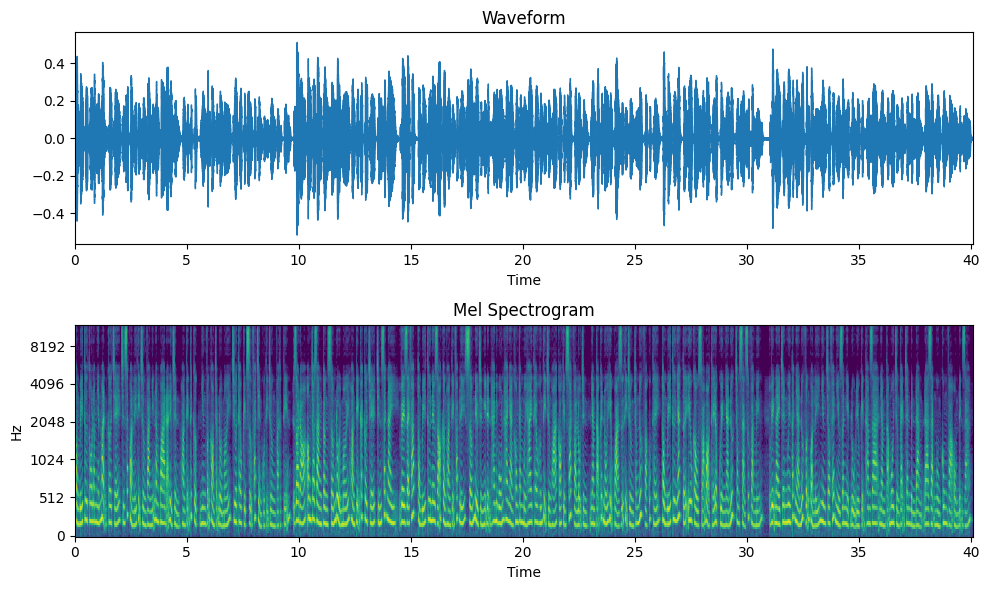

In [15]:
avg_style         = False
denoise           = 0.3
n_merge           = 6

steps             = 18
embedding_scale   = 2
with torch.no_grad():
    phonemes = get_phoneme(text=text, lang="vi")
    styles  = model.get_styles(speaker, denoise, avg_style)
    list_wav = model.generate(phonemes, styles, steps, embedding_scale, n_merge, use_diffusion=True)
    wav = np.concatenate(list_wav)
# for chunk in list_wav:
#     display(ipd.Audio(chunk, rate=24000, normalize=True))
print('Synthesized:')
display(ipd.Audio(wav, rate=24000, normalize=True))

plot(wav)